In [1]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


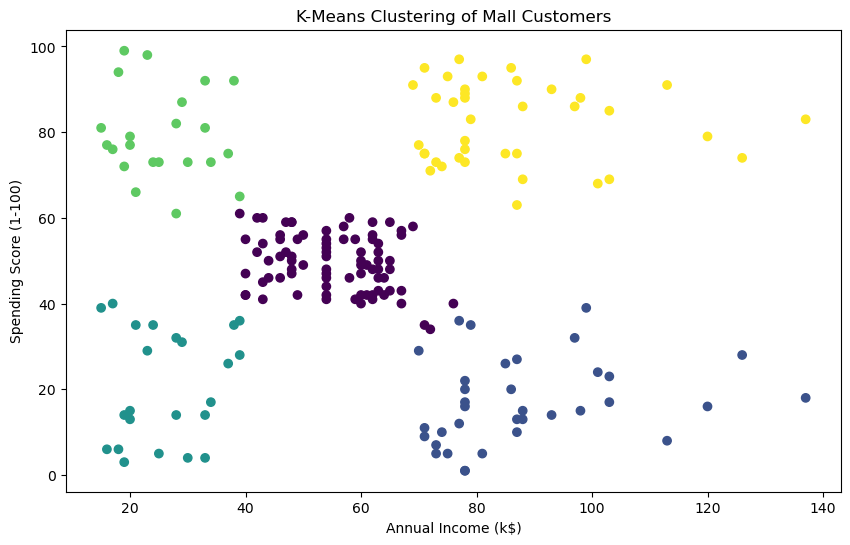

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.show()


D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

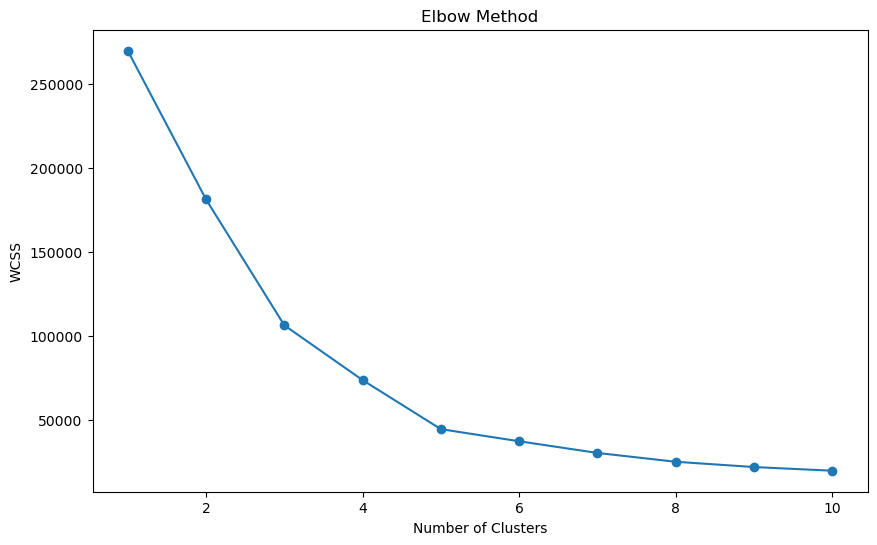

In [3]:
# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Installation\andaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

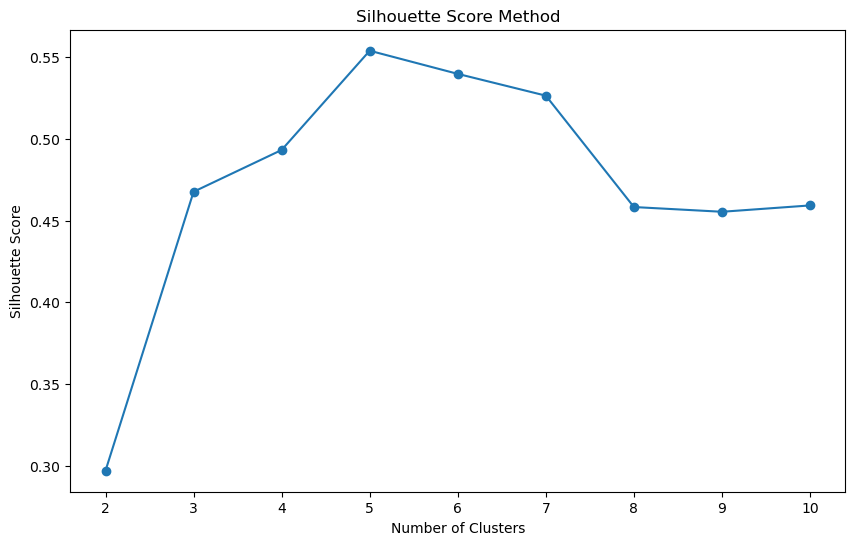

In [4]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
sil_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()


In [5]:
# Display cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster Centroids:")
print(centroids)

# Analyze cluster characteristics
data.groupby('Cluster').mean()


Cluster Centroids:
[[ 44.32258065  52.12903226]
 [ 81.          32.27272727]
 [109.7         82.        ]
 [ 24.58333333   9.58333333]
 [ 78.55172414  82.17241379]
 [ 60.26530612  49.2244898 ]
 [112.625       18.625     ]
 [ 24.95        81.        ]
 [ 28.18181818  33.27272727]
 [ 79.68421053  10.73684211]]


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

# Perform hierarchical clustering
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
data['HC_Cluster'] = hc.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['HC_Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()
